<a href="https://colab.research.google.com/github/yuki86/robotica/blob/master/exer1_funcionando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

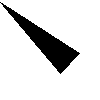

3


In [138]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import random
amostras = 100     

#tamanho da área disponível
altura = amostras
largura = amostras

f = open("dataset_exe1.csv", "w")
data = ""
for py in range(0,altura):
  for px in range(0, largura):
    data = data + "P"+str(py)+str(px)+","
data = data + "Saida\n"
f.write( data )

for amostra in range(0,amostras):
  img = np.zeros([altura,largura,3])
  for py in range(0,altura):
    for px in range(0, largura):
      img[px][py][0] = 255   # cor azul
      img[px][py][1] = 255   # cor verde
      img[px][py][2] = 255   # cor vermelho

  #escolha random da figura a mostrar
  escolha=random.randint(1,3)
  if (escolha==1):
    tamanho = random.randint(0, amostras)
    xmin = random.randint(0, amostras - tamanho) 
    ymin=xmin 
    xmax=(xmin+tamanho)
    ymax=xmax

    #gera a forma de um quadrado
    cv2.rectangle(img,(xmin, ymin),(xmax,ymax),(0,0,0),-1)
    #forma(arquivo,(coordenadas do ínicio -> x,y), (coordenadas do final -> x,y), (cores RGB), espessura -> -1 equivale a preenchido)

  elif (escolha==2):
    #define dimensões random da forma
    xcentro = random.randint(1, amostras-1) 
    ycentro = random.randint(1, amostras-1) 
    raio=random.randint(1,(amostras/2))
   
    #gera a forma de um círculo
    while (raio >= (amostras-xcentro) or raio >= (amostras-ycentro) or raio >= (xcentro-0) or raio >= (ycentro-0)):
      xcentro = random.randint(1, amostras-1) 
      ycentro = random.randint(1, amostras-1) 
      raio=random.randint(1,(amostras/2))
    else:
      cv2.circle(img,(xcentro, ycentro), raio, (0,0,0), -1)
      #(arquivo,(coordenadas do centro -> x,y), raio, (cores RGB), espessura -> -1 equivale a preenchido)

  else:
    #define dimensões random da forma
    xe=random.randint(0, amostras)
    ye=random.randint(0, amostras)
    xp=random.randint(0, amostras)
    yp=random.randint(0, amostras)
    xd=random.randint(0, amostras)
    yd=random.randint(0, amostras)

    #gera a forma de um triângulo
    while (yp >= ye or yp >= yd or xd <= xe):
      xe=random.randint(0, amostras)
      ye=random.randint(0, amostras)
      xp=random.randint(0, amostras)
      yp=random.randint(0, amostras)
      xd=random.randint(0, amostras)
      yd=random.randint(0, amostras)
    
    else:
      #[[coordenadas do vértice esquerdo -> x,y], [coordenadas do vértice central -> x,y], [coordenadas do vértice direito -> x,y] obs: y do esquerdo e direito iguais para base reta)
      pts = np.array([[xe,ye],[xp,yp],[xd,yd]], np.int32)
      pts = pts.reshape((-1,1,2))
      cv2.fillPoly(img, [pts], color=(0, 0, 0)) #este comando faz o mesmo que a espessura -1

  data = ""
  for py in range(0,altura):
    for px in range(0, largura):
      data = data + str(int(img[px][py][0]))+","
  data = data + "0\n"

  f.write( data )

f.close()

cv2_imshow(img)
print(escolha)

